# Predicting heart disease using machine learning

This notebook uses machine learning to predict whether someone has heart disease based on their medical attributes

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict if someone has heart disease or not?

## 2. Data

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy, we'll pursue the project

This of course will change overtime as the nature of the project is experimental

## 4. Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [2]:
# EDA and plotting libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("11.2 heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

We want to quickly find:
- Distributions
- Missing values
- Outliers
- Have a sense of what the data tells you (ask questions you want to answer)

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Since they are close to each other, this can be considered as a balanced dataset

<Axes: >

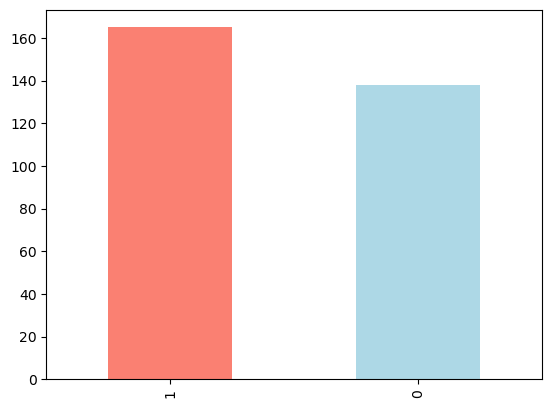

In [8]:
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [9]:
## Check for missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There aren't any missing data and they are all in the right formats

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The average age is around 54, with an SD of 9. That means the data is mostly around/close the mean.

In [11]:
# Check Gender Frequency

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

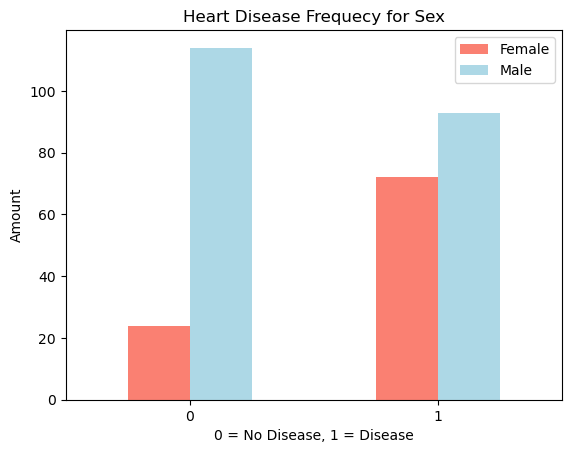

In [24]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequecy for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', "Male"])
plt.xticks(rotation=0)

There are 96 women and 72 of them have a positive value for heart disease, based on this, if a person is a woman, then there's a 75% chance that she has heart disease. 

As for males, there are 207 males, with almost 100 with heart disease. There's a 44.9% chance they have heart disease if they are a male

This means, on average, a person has a 60% chance they have heart disease.

This can serve as a baseline that we can prove with machine learning

## Age vs Max Heart Rate for Heart Disease

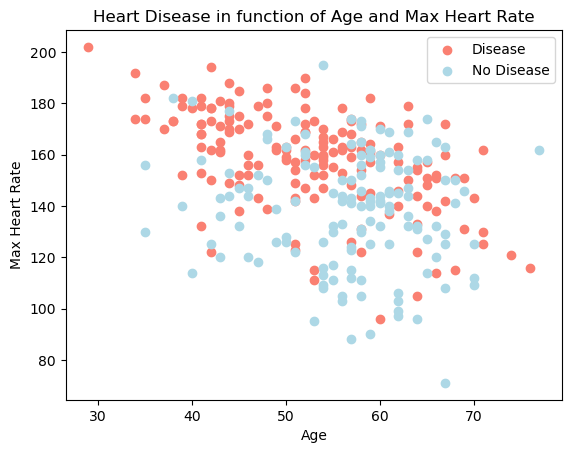

In [25]:
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

It seems the younger you are, the higher your max heart rate is, and the older you are, it becomes relatively lower. We can also see that most of the data lies between ages around 40 - 60. 

## Heart Disease Frequency per Chest Pain Type

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

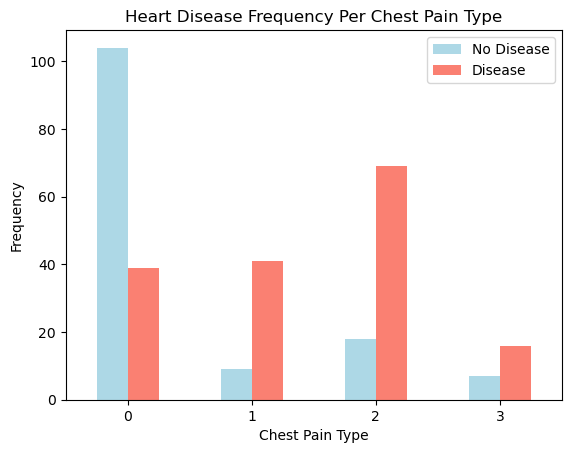

In [27]:
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['lightblue', 'salmon'])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

Based on the different chest pain types, those that are asymptomatic have the lowest count with heart disease, while those experiencing spasms have the most number of heart disease. While those with heart disease attributed with typical angina is relatively high, they are the ones with the most count of no disease. 

Its also worth noting that those with non-heart related chest pains, have higher ratios of with disease. However, we don't really know what these types mean until we ask a subject matter expert

## Correlation between independent (X) variables

This may give an idea of which independent variables may or may not have an impact on our target variable

<Axes: >

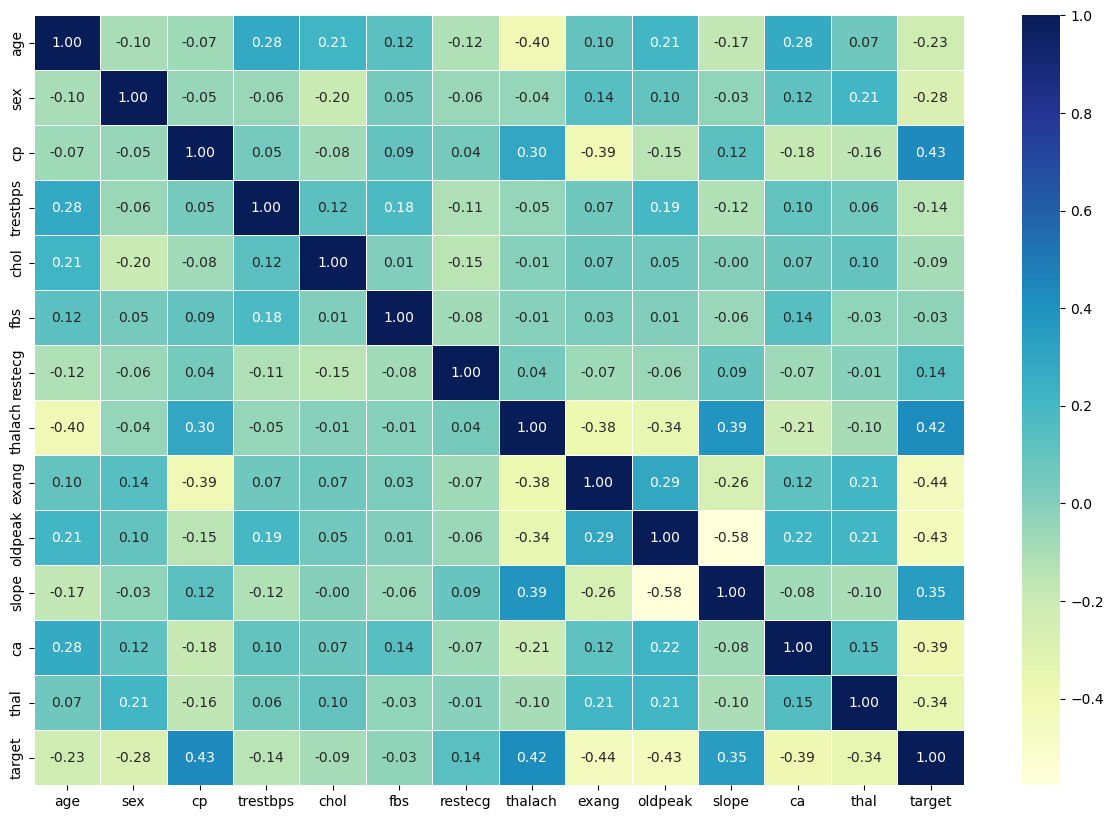

In [30]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap="YlGnBu")

Focusing on the target variable, we can see that chest pain type, max heart rate, and slopes are the most potentially correlated variables attributing to our target variable

**What have we learned so far?**

- We have 60% probability baseline of having a heart disease
- Most of the data are between 40 to 60 in ages
- There are more males than females with heart disease, however, the ratios indicates that women are more prone to heart disease

## 5. Modeling

Now that we've explored the data, let's use machine learning to predict the target variable based on the other features. 

Things to remember:
 > Given clinical parameters about a patient, can we predict whether or not they have heart disease?
 
 > If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.
 

In [37]:
# Create X and y variables
X = df.drop('target', axis=1)
y = df['target']

## Training and Test split

Training set is to train the model and test set is to test it

In [39]:
# random seed for reproducibility
np.random.seed(42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [41]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## Model Choices

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest

`score()` returns the ratio of correct predictions

In [43]:
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(),
         "RandomForest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(45)
    model_scores = {}
    #loop through the different models
    for name, model in models.items():
        model.fit(X_train, y_train)
        #evaluate the model and append it to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [44]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/Users/bastymvergara/Desktop/heart-disease-project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'RandomForest': 0.8524590163934426}

## Model Comparison

In [46]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,KNN,Logistic Regression,RandomForest
accuracy,0.688525,0.885246,0.852459


<Axes: >

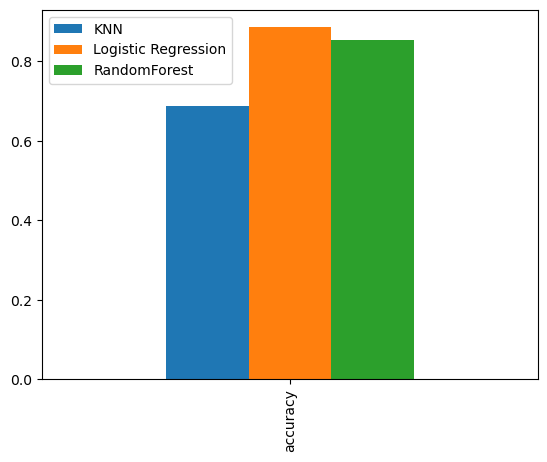

In [47]:
model_compare.plot(kind='bar', color)

As we can see, Logistic Regression performed the best. It is quite common that the simplest models work the best

## Hyperparameter Tuning and Cross-Validation

The reason for this is because we are looking for the best model that does well on our dataset but also does well on unseen data

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

In [52]:
### KNN Tuning

train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through the different n of neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [53]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


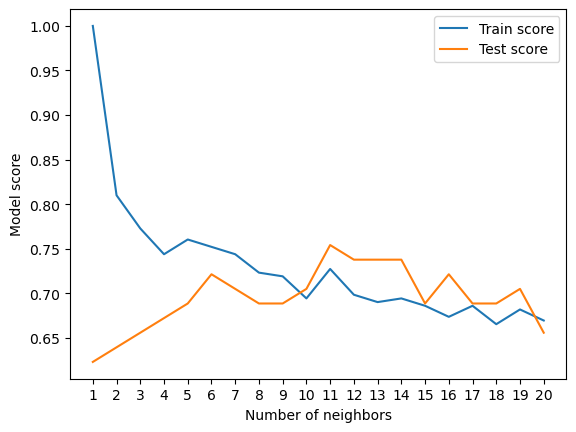

In [54]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

By looking at this graph, it seems we can choose a number between 5 to 11. However, even if we change this, the model score is still too low compared to the other models during initial fitting of the model. Due to this reason, let's discard KNN as an option. 

What I did here is that I tuned KNN manually by looping through different numbers of K, which is not really ideal. So instead, let's use RandomizedSearchCV for the other two models. **RandomizedSearchCV** tries a number of randomized combinations then evaluates them and saves the best.

## Tuning with RandomizedSearchCV

In [55]:
# Different LogisticRegression hyperparameters called as hyperparameter grid
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [56]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, # this means it will try out 20 different combinations of hyperparameters
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [57]:
# this gives out the best parameter combination
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [59]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [60]:
# Tuning RandomForest
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [62]:
rs_rf.score(X_test, y_test)

0.8688524590163934

There is a slight performance boost in both models. Let's try tuning it further but this time using `GridSearchCV`

`RandomizedSearchCV` searches over a grid of hyperparameters based on the number of iterations given, but `GridSearchCV` will try every single possible combination without any given number of iterations

## Tuning with GridSearchCV

In [63]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [64]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [66]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

It seems it gave me the same results as with RandomizedSearchCV. It is generally a good idea to start with RCV first then refine it with GridSearchCV

## Evaluating a classification model, beyond accuracy

Now that we're done tuning the model, let's evaluate it

We want:

- ROC curve and AUC score - `plot_roc_curve()`
- Confusion matrix - `confusion_matrix()`
- Classification report - `classification_report()`
- Precision - `precision_score()`
- Recall - `recall_score()`
- F1-score - `f1_score()`

To get these metrics, we need to create predictions on the test set using `predict()` on a trained model and passing it the X_test

In [67]:
# Make predictions on test data
y_preds = gs_log_reg.predict(X_test)

In [77]:
y_preds_proba = gs_log_reg.predict_proba(X_test)

In [68]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

>To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function plot_roc_curve which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the plot_roc_curve function we can see it takes (estimator, X, y) as inputs. Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.

Apparently plot_roc_curve is now depreciated so I will be skipping this step. But an example would be:

"This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement."

## Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [83]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


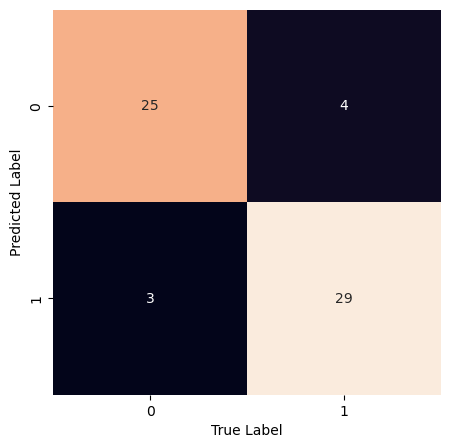

In [86]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test, y_preds)

There are 4 occassions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 when it should've been 0 (false positive)

## Classification Report

We can use `classification_report()` and passing it the true labels as well as our models predicted labels

This will give us info on the precision and recall for each class

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. Basically tells you how well does the model predict correctly most of the time. If precision is 0.5, then that means it is correct 50% of the time
- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. Basically tells you how many positives did it get correctly. If 0.11 then that means it correctly identified 11% correctly
- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- Support - The number of samples each metric was calculated on.
- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


The next thing we need to do is to calculate these metrics using cross-validation using `cross_val_score()`

In [88]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [89]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [90]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [91]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [92]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [93]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1


0.8705403543192143

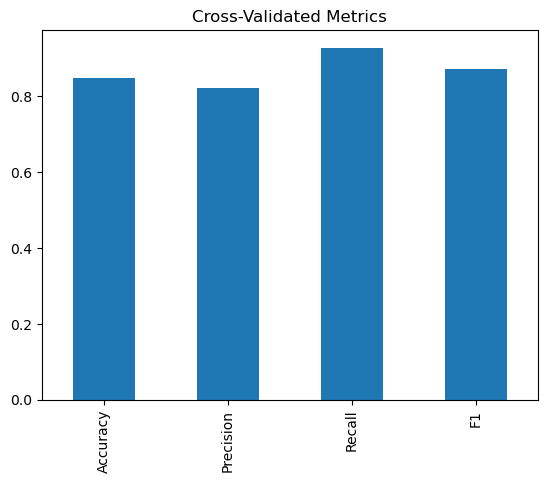

In [94]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature Importance

This is another way of asking which features contributed the most to the outcomes of the model?

In each model we use, there's a slightly different way of finding which features were most important

We'll use `coef_` because this is specific for logistic regression. It shows the coefficient of the features in the decision making

In [95]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [96]:
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [97]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

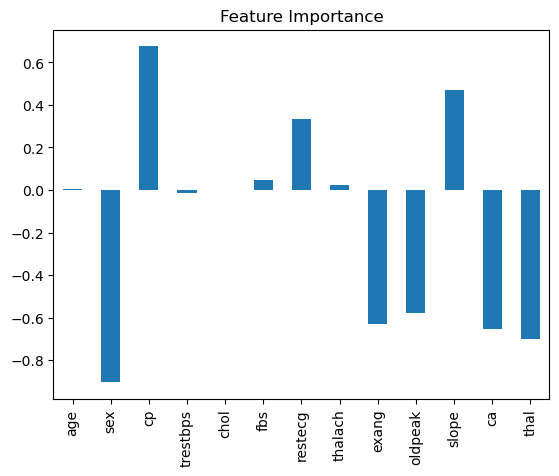

In [98]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);


The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

## What next?

- We didnt reach the baseline value we indicated at the start, which was 95% accuracy.
- Now we know Logistic Regression doesnt meet our criteria, then its time to do more experiments. Ask your team what else is there to do to improve it.